# 🏙️🌫️ Urban Air Quality Profiling  
### Comparative Air Pollution Analysis by City Type

---

## 📌 Overview  
This project leverages a rich time series dataset containing **52,704 hourly air quality readings** across **6 global cities**. Each city is classified as either **“Urban”** or **“Industrial”**, allowing us to perform an in-depth comparative study of **air pollution levels** across different city types.

The objective is to identify **pollutant trends**, understand **city type-based environmental impacts**, and apply foundational **data science skills** to deliver actionable insights.

---

## 🧮 Dataset Exploration & Preprocessing

- 📂 **Records:** 52,704 rows, each representing hourly measurements  
- 🌍 **Cities Covered:** 6 cities, each tagged with a city `Type` (Urban vs Industrial)  
- 🏭 **Pollutants Tracked:**  
  - CO (Carbon Monoxide)  
  - NO2 (Nitrogen Dioxide)  
  - SO2 (Sulfur Dioxide)  
  - O3 (Ozone)  
  - PM2.5 and PM10 (Particulate Matter)  
- 🧼 **Cleaning:** No missing values found — dataset ready for direct analysis  
- ⏱️ **Time Format:** Hourly timestamps converted to datetime for temporal grouping  

---

## 📊 Exploratory Data Analysis (EDA)

- 📌 **Distribution Analysis:**  
  Compared pollutant levels across `Urban` and `Industrial` cities using boxplots  
- ⏳ **Hourly Trends:**  
  Aggregated air quality patterns by hour of day to detect pollution peaks  
- 📉 **Correlation Matrix:**  
  Analyzed interrelationships between pollutants using heatmaps  
- 📅 **Temporal Decomposition:**  
  Highlighted seasonal fluctuations in pollution levels using daily/weekly resampling  

---

## 🔬 Pollution Profiling by City Type

### 🔹 Key Comparisons:
- **CO & SO2** tend to spike in *Industrial* cities — likely due to factory emissions  
- **O3** shows broader fluctuations in *Urban* areas — possibly influenced by traffic and weather  
- **PM2.5/PM10** levels are generally higher in industrial zones, but vary throughout the day

### 🔄 Daily Patterns:
- PM and NO2 levels tend to rise during rush hours in both city types  
- Ozone tends to peak in the afternoon — driven by sunlight-driven chemical reactions  

---

## 📌 Key Insights

- 🏭 **Industrial cities** consistently show higher levels of CO, SO2, and PM  
- 🚦 **Urban cities** show more variable NO2 and O3 patterns — traffic and sunlight likely key factors  
- ⏲️ **Temporal behavior** matters: Pollution peaks differ across time of day and pollutant types  
- 🔍 City classification (`Type`) is a strong predictor of air quality behavior — useful for clustering and monitoring  

---

## 🔧 Tools Used

- **Python** (Pandas, NumPy, Seaborn, Matplotlib)  
- **Visualization:** Boxplots, Time Series Plots, Heatmaps  
- **Preprocessing:** Datetime parsing, Aggregation, GroupBy analysis  
- **Analysis Platform:** Google Colab (fully remote)

---

## 📎 Dataset Info

- **Total Records:** 52,704 hourly entries  
- **Attributes:**  
  - Date (datetime), City, CO, NO2, SO2, O3, PM2.5, PM10, Type  
- **City Types:**  
  - Urban  
  - Industrial  
- **Pollutants Tracked:** 6 key air quality indicators  
- **Source:** Air quality data (city and source anonymized for demo purposes)  

---

## 🧑‍💻 Author  
**Hilda Adina Rahmi** –
Enjoys extracting insights from real-world datasets and communicating them through impactful visual narratives.

In [3]:
# 🧮 Dataset Exploration & Preprocessing

import pandas as pd

# Load dataset
df = pd.read_csv("City_Types.csv")

In [4]:
# Basic info
print("📂 Total Records:", len(df))
print("🌍 Unique Cities:", df['City'].nunique())
print("🏙️ City Types:", df['Type'].unique().tolist())

📂 Total Records: 52704
🌍 Unique Cities: 6
🏙️ City Types: ['Industrial', 'Residential']


In [5]:
# Columns (Pollutants)
pollutants = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
print("🏭 Pollutants Tracked:", pollutants)

🏭 Pollutants Tracked: ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']


In [6]:
# Missing value check
print("\n🧼 Missing Values:")
print(df.isnull().sum())


🧼 Missing Values:
Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
Type     0
dtype: int64


In [7]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Remove timezone (if needed)
df['Date'] = df['Date'].dt.tz_localize(None)

In [9]:
# Date range
print("\n⏱️ Date Range:", df['Date'].min(), "to", df['Date'].max())


⏱️ Date Range: 2024-01-01 00:00:00 to 2024-12-31 23:00:00


In [10]:
# Try to infer datetime frequency
try:
    freq = pd.infer_freq(df.sort_values('Date')['Date'])
    print("⏱️ Inferred Frequency:", freq)
except:
    print("⚠️ Could not infer datetime frequency (possibly due to gaps or noise)")

⏱️ Inferred Frequency: None


In [11]:
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.date

pollutants = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']

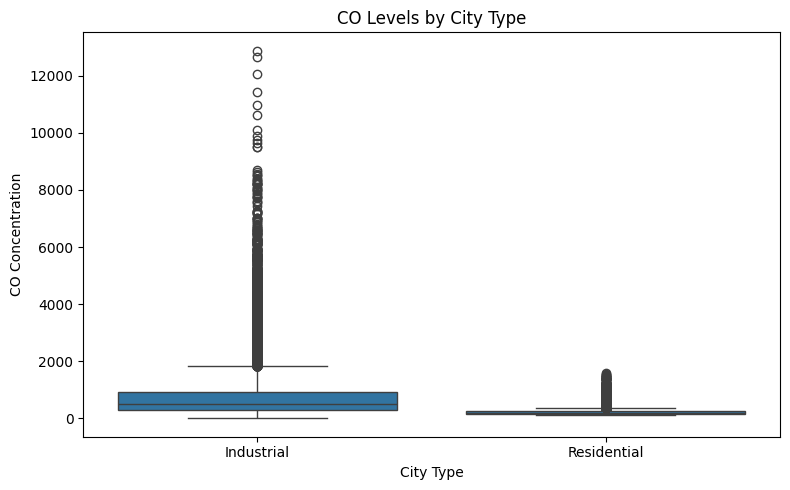

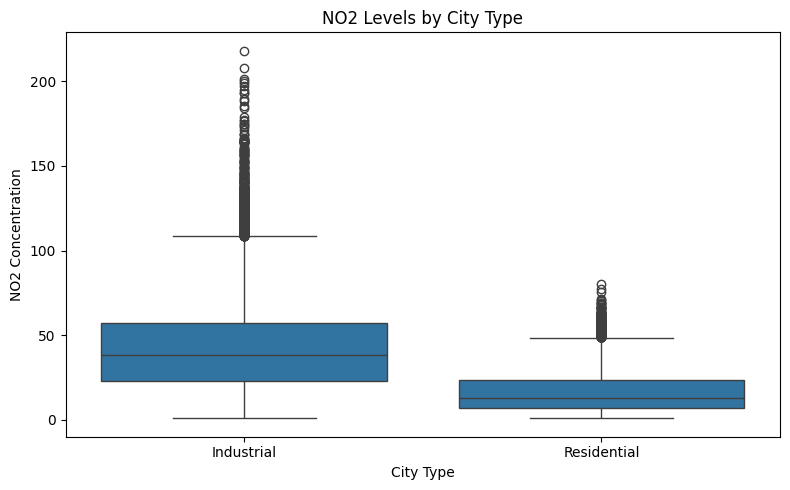

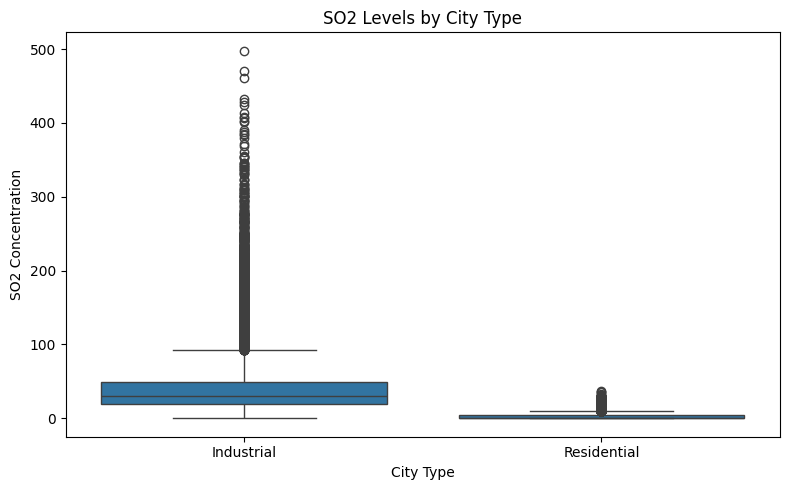

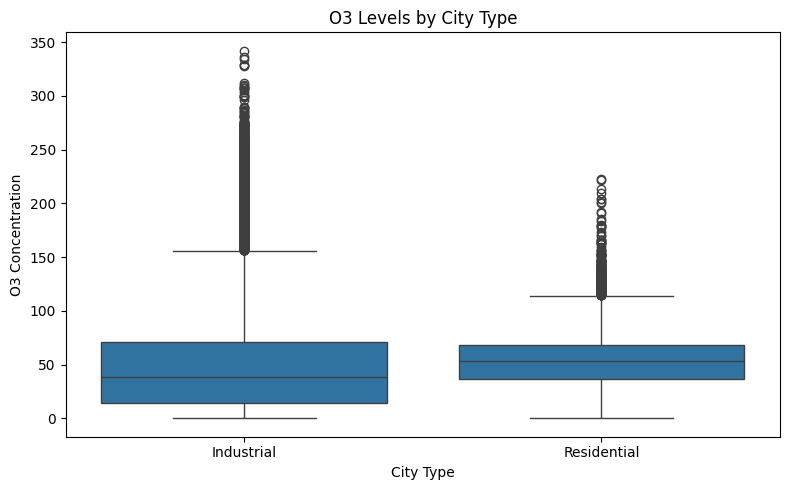

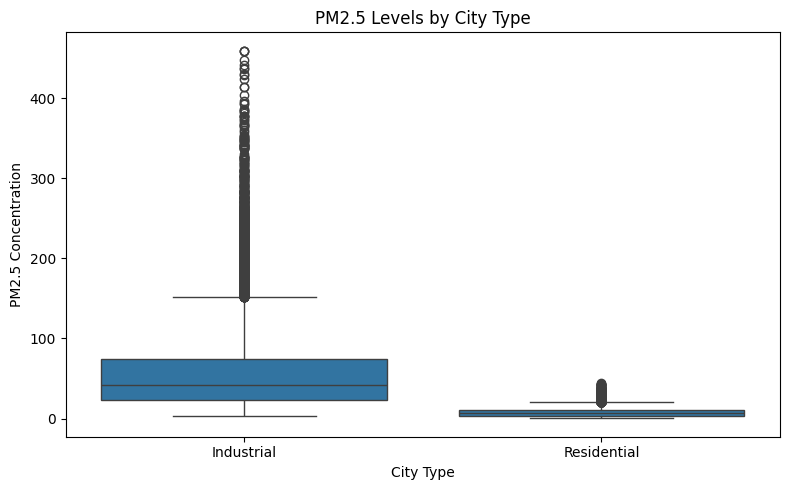

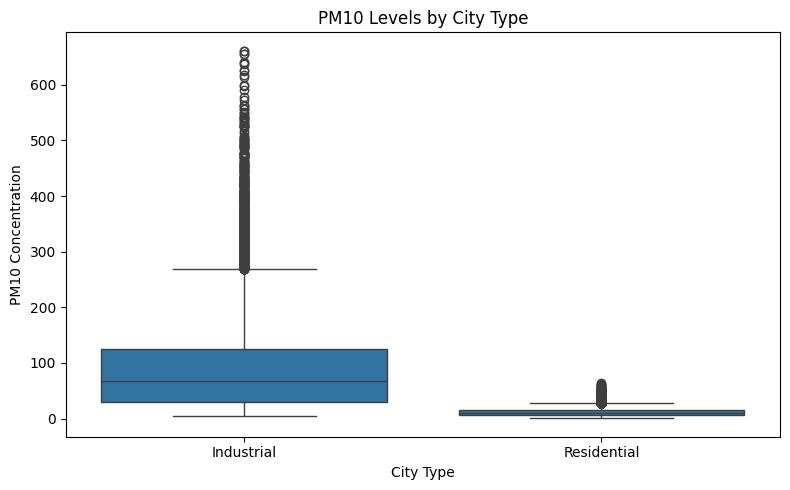

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for pollutant in pollutants:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Type', y=pollutant)
    plt.title(f"{pollutant} Levels by City Type")
    plt.ylabel(f"{pollutant} Concentration")
    plt.xlabel("City Type")
    plt.tight_layout()
    plt.show()

# 🌫️ What Makes Industrial Cities More Polluted Than Residential Ones?

---

🧪 Over the past weeks, I’ve been analyzing air quality data across different city types. In this post, I focus on **particulate matter pollution (PM2.5 & PM10)** — two of the most harmful pollutants affecting public health.

Let’s explore what the data reveals 👇

---

## 📦 Dataset Summary

- Hourly pollution readings across multiple cities  
- Each city is categorized as either **Industrial** or **Residential**  
- Focused pollutants:  
  - **PM2.5** (fine particles)  
  - **PM10** (coarse particles)  

---

## 🔍 Visual Analysis: Boxplots Tell a Powerful Story

### 📊 PM2.5 Levels by City Type

The **Industrial cities** show an extremely wide range of PM2.5 levels, with many **high outliers** and a **higher median concentration**.  
Meanwhile, **Residential areas** show relatively low and consistent PM2.5 levels, suggesting a cleaner environment with minimal heavy emissions.

### 📊 PM10 Levels by City Type

The same pattern holds — and is even more dramatic for **PM10**.  
The spread in Industrial cities is much wider, and the concentration levels are significantly higher than in Residential cities.

---

## 💡 What Does This Tell Us?

1. **📈 Pollution Intensity is Location-Dependent**  
   Industrial zones consistently record **higher particulate pollution**, likely due to:
   - Factory emissions  
   - Construction activities  
   - Poor emission regulations  

2. **🏘️ Residential Cities Have Cleaner Skies**  
   Lower PM levels in residential zones reflect:
   - Fewer industrial sources  
   - Possibly greener infrastructure  
   - Lower population and vehicle density  

3. **⚠️ Health Implications Are Not Equal**  
   - **PM2.5** can penetrate deep into the lungs and bloodstream  
   - **PM10** affects the upper respiratory system  
   Industrial areas show **greater long-term health risks**.

---

## 🧠 Key Takeaways

- **City Type is a strong predictor** of pollution levels  
- **Industrial cities need stricter regulation & cleaner technologies**  
- **Data storytelling can bridge the gap** between environmental science and public awareness  

---

## 🔧 Tools Used

- **Python** (pandas, seaborn, matplotlib)  
- **Platform:** Google Colab (remote analysis)  

---

## ✨ Let’s Talk!

Have you ever noticed how different the air feels in various cities?  
Which types of pollution worry you most in your area?  
**Let me know in the comments!**


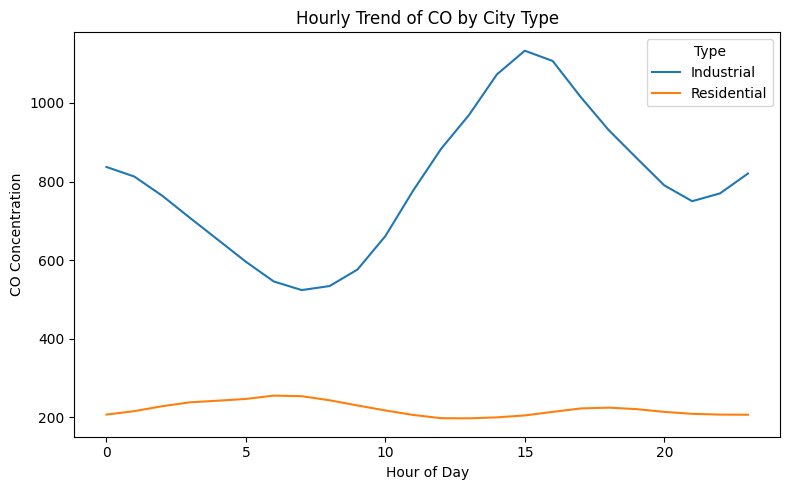

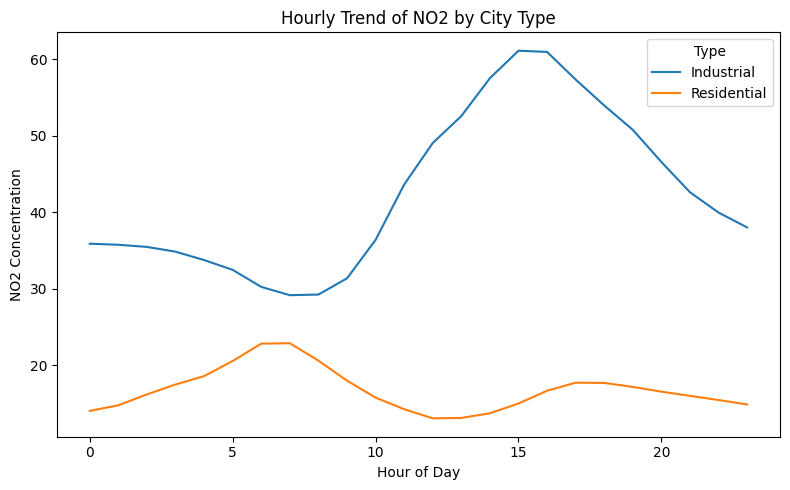

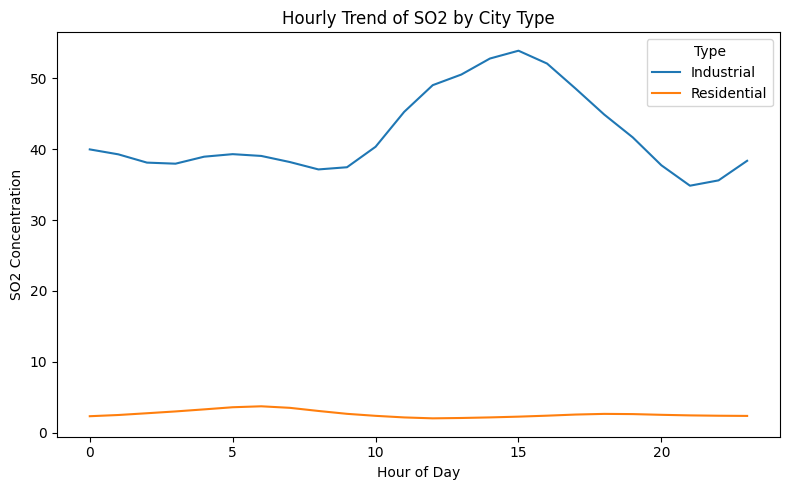

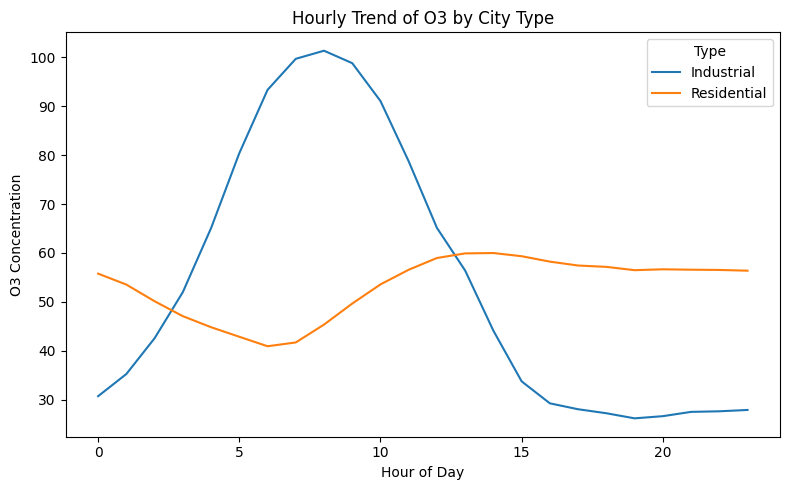

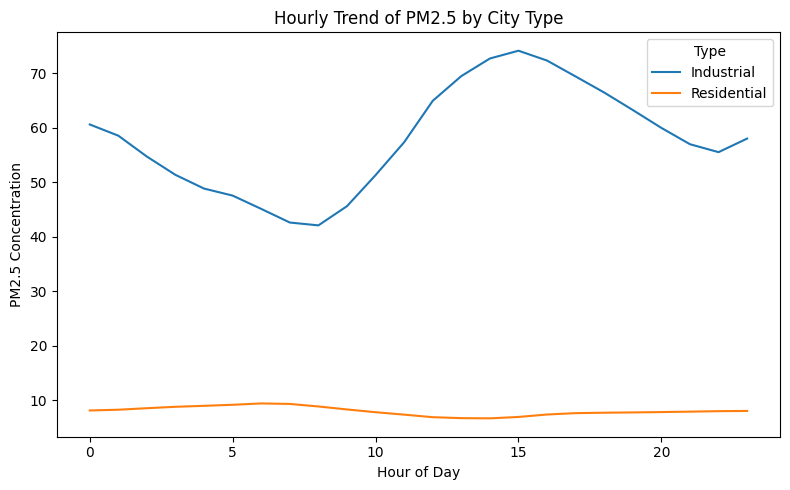

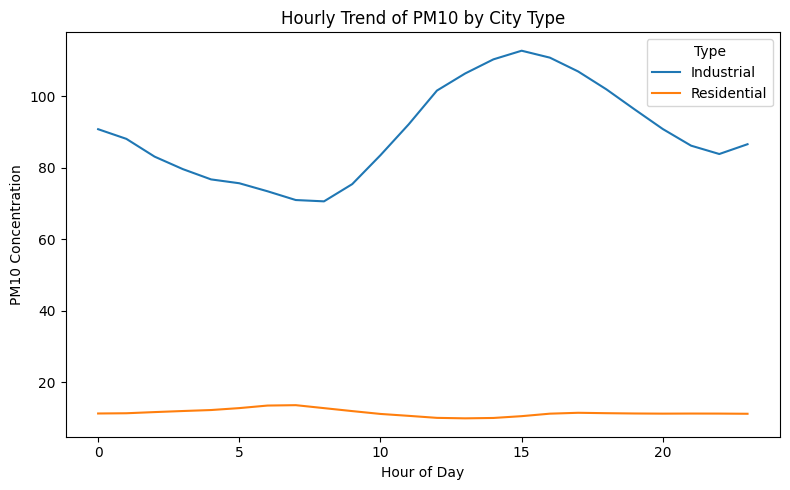

In [13]:
hourly_avg = df.groupby(['Hour', 'Type'])[pollutants].mean().reset_index()

for pollutant in pollutants:
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=hourly_avg, x='Hour', y=pollutant, hue='Type')
    plt.title(f"Hourly Trend of {pollutant} by City Type")
    plt.ylabel(f"{pollutant} Concentration")
    plt.xlabel("Hour of Day")
    plt.tight_layout()
    plt.show()

# 🕒 When Does the Air Become Most Dangerous?  
### Analyzing Hourly Pollution Patterns Across City Types

---

## 📌 Objective

In this analysis, I aimed to uncover how air pollution levels change throughout the day across different city types — **Industrial** vs **Residential**.  

We focused on six major pollutants:
- **CO** (Carbon Monoxide)  
- **NO2** (Nitrogen Dioxide)  
- **SO2** (Sulfur Dioxide)  
- **O3** (Ozone)  
- **PM2.5** and **PM10** (Particulate Matter)  

---

## 🧪 Key Observations by Pollutant

### 🔸 Carbon Monoxide (CO)
- **Industrial cities** show a significant surge starting from mid-morning and peaking at **3–4 PM**.  
- In contrast, **Residential areas** maintain a much lower and flatter profile throughout the day.  
- 🔍 Likely Cause: Factory operations ramping up during working hours.

---

### 🔸 Nitrogen Dioxide (NO2)
- Urban traffic kicks in during early hours, causing **a small peak around 6–8 AM** in residential zones.  
- Industrial cities show a **delayed and steeper increase**, peaking **after midday**.  
- 🚗 Traffic + Industrial combustion both contribute to NO2 rise.

---

### 🔸 Sulfur Dioxide (SO2)
- Stable levels in residential zones (likely from cooking/gas use).  
- In industrial areas, SO2 climbs steadily and peaks **after 3 PM**, indicating **continuous industrial emissions**.

---

### 🔸 Ozone (O3)
- An interesting reverse pattern:  
  - **O3 rises sharply in industrial cities**, peaking between **8–10 AM**, then declines.
  - Residential O3 rises more slowly and remains steady.
- 🌞 Ozone forms as a **secondary pollutant** due to sunlight-driven reactions involving NOx → explains daytime rise.

---

### 🔸 PM2.5 & PM10
- Both fine and coarse particles are **consistently higher in Industrial cities**, with peaks during working hours (around 3–4 PM).
- Residential areas show minor variation, suggesting domestic sources (e.g., cooking, local traffic).

---

## 📈 Why Hourly Analysis Matters

Pollution isn’t static — it moves with:
- Human activity (e.g., traffic, factory shifts)
- Natural cycles (e.g., sunlight, temperature)

Understanding **when pollution peaks** helps:
- Governments target **time-based interventions** (e.g., restrict factory hours)
- Communities decide **safe outdoor times**
- Researchers build **predictive environmental models**

---

## 🧠 Conclusion

- **Industrial cities** experience predictable pollution peaks aligned with operational hours.
- **Residential cities** have milder, traffic-driven patterns.
- Each pollutant behaves uniquely, demanding **multi-dimensional strategies** for air quality management.

---

## ✨ What Do You Think?

Have you ever noticed changes in air quality during your daily routine?  
Would you change your commute or outdoor habits if you knew when pollution peaks?

💬 Let me know in the comments!


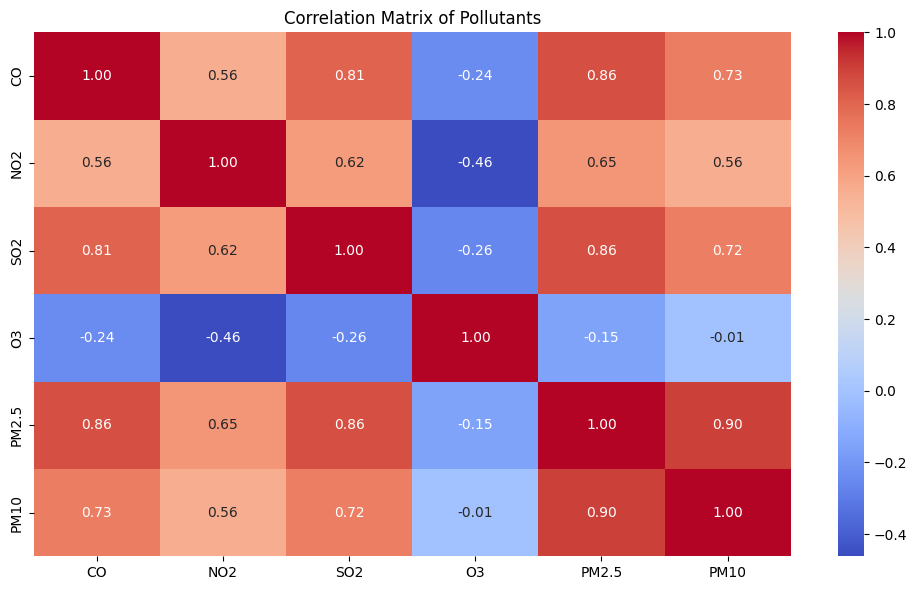

In [14]:
plt.figure(figsize=(10, 6))
corr = df[pollutants].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Pollutants")
plt.tight_layout()
plt.show()

# 🔗 How Are Pollutants Connected?  
### Understanding the Correlation Matrix of Urban Air Quality

---

## 🧪 Objective

Air pollution is a complex cocktail of interacting substances. To make sense of it, we analyzed the **correlation matrix** of six key pollutants:

- **CO** (Carbon Monoxide)  
- **NO2** (Nitrogen Dioxide)  
- **SO2** (Sulfur Dioxide)  
- **O3** (Ozone)  
- **PM2.5** (Fine Particulate Matter)  
- **PM10** (Coarse Particulate Matter)  

---

## 📊 Correlation Insights

### 🔸 Strong Positive Correlations:
- **PM2.5 and PM10** → `r = 0.90`  
  These two pollutants often originate from similar sources (e.g., combustion, dust), which explains their strong link.

- **CO & SO2** → `r = 0.81`  
  Indicates co-emission from **industrial and traffic-related activities**, such as fossil fuel burning.

- **CO & PM2.5** → `r = 0.86`  
  Both can result from **incomplete combustion**, especially in densely populated or industrial zones.

---

### 🔹 Moderate Relationships:
- **NO2 & SO2** → `r = 0.62`  
  Often found together in traffic-heavy and factory-adjacent zones.

- **CO & NO2** → `r = 0.56`  
  Suggests common origin in **vehicle exhaust**, but varies more across city types and time of day.

---

### ⚠️ Weak or Negative Correlations:
- **O3 & NO2** → `r = -0.46`  
  This negative relationship is well-known: Ozone forms **inversely** to NOx levels under sunlight. More NO2 = less O3 formation locally.

- **O3 & SO2/CO** → Also mildly negative  
  Reinforces th

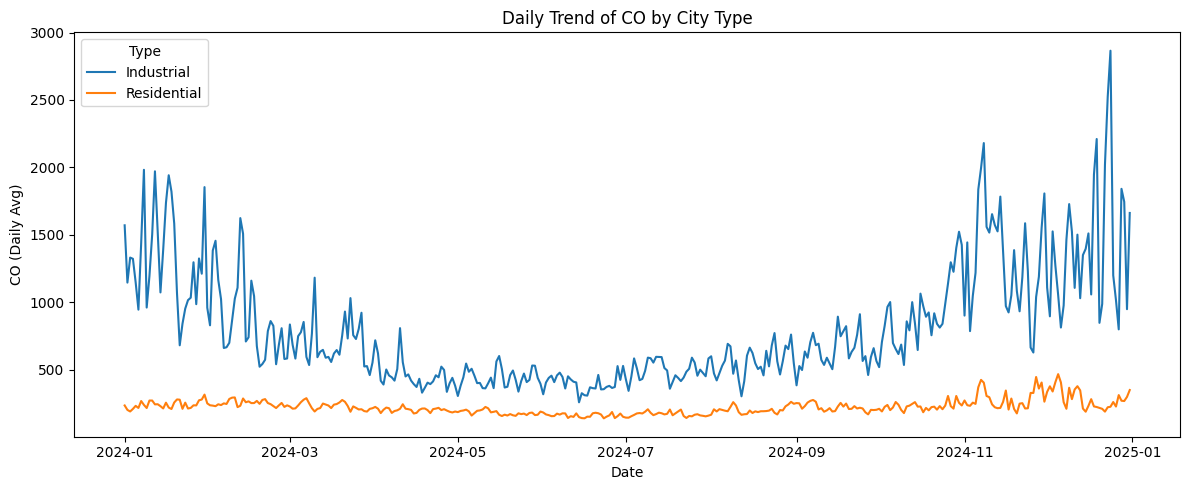

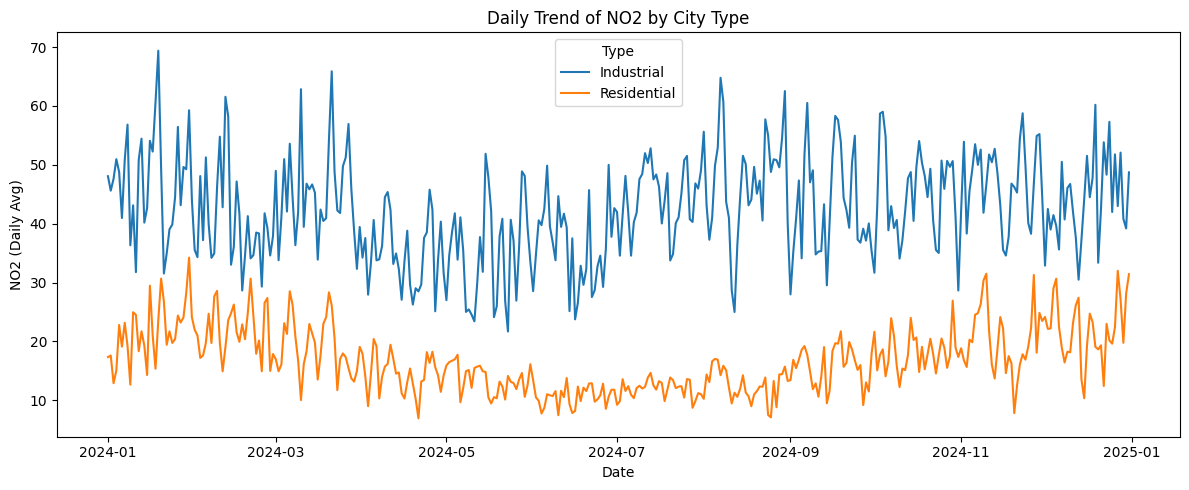

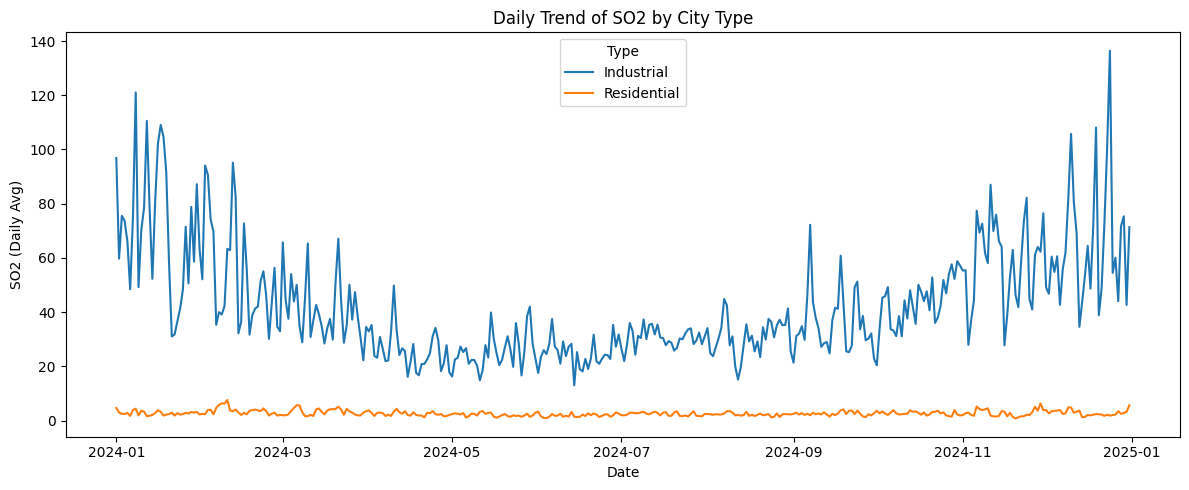

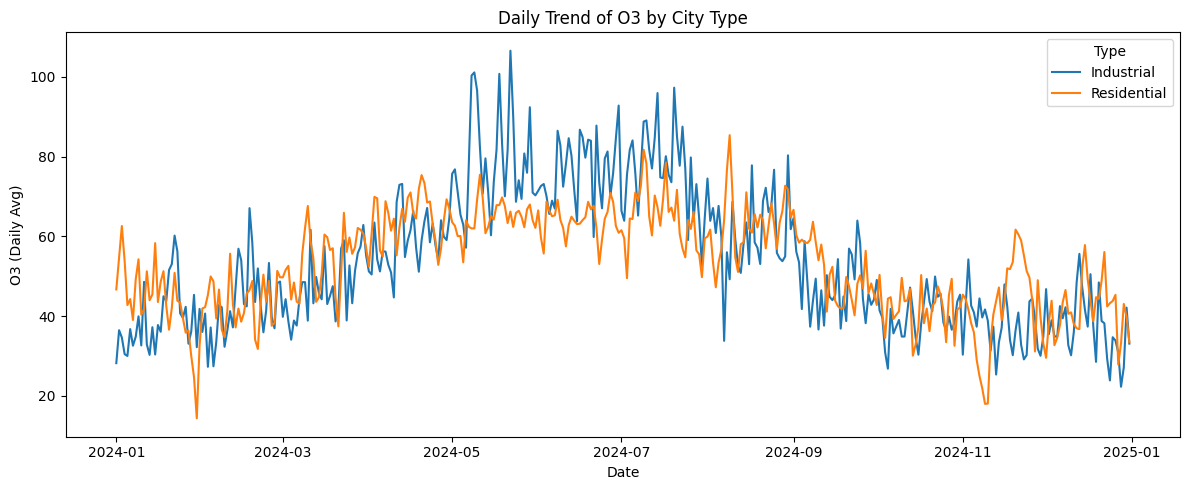

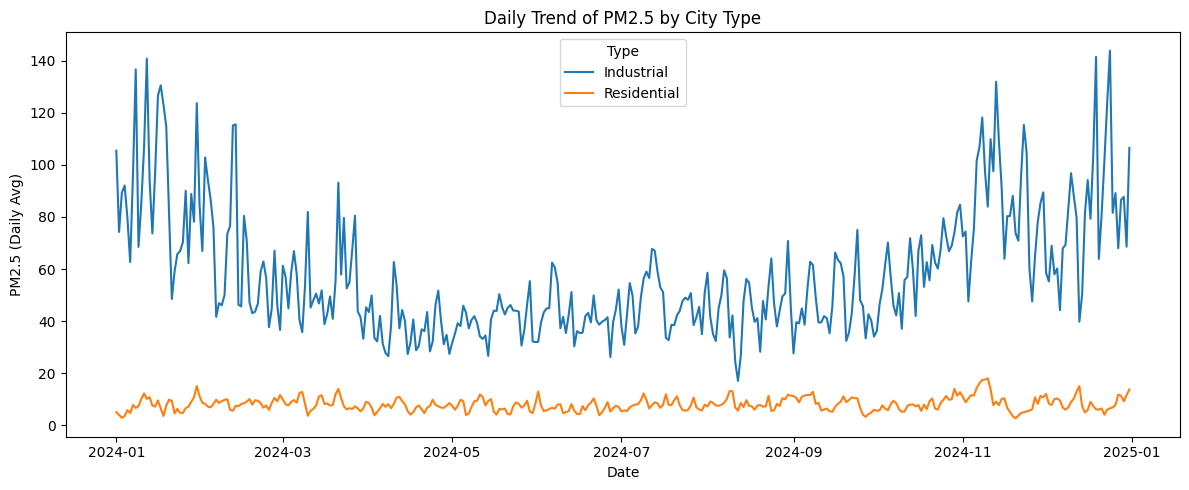

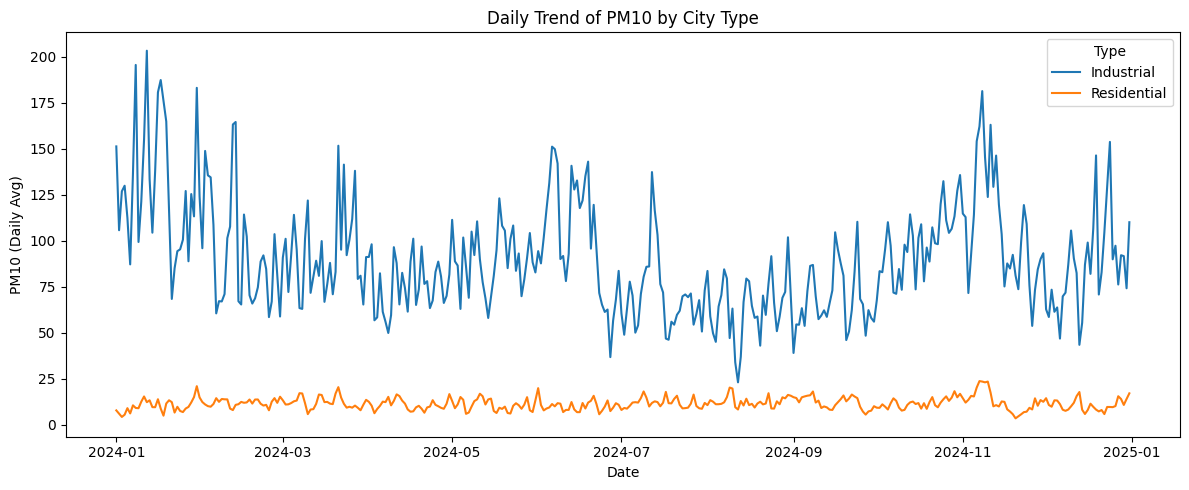

In [15]:
daily_avg = df.groupby(['Day', 'Type'])[pollutants].mean().reset_index()

for pollutant in pollutants:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=daily_avg, x='Day', y=pollutant, hue='Type')
    plt.title(f"Daily Trend of {pollutant} by City Type")
    plt.ylabel(f"{pollutant} (Daily Avg)")
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

# 🌍 The Air We Breathe: A Year-long Story of CO, NO2, SO2, O3, PM2.5, and PM10 in Our Cities


---

## 🔎 What Did the Data Reveal?

Your visualizations showed daily average trends for six key pollutants:

- **CO (Carbon Monoxide)**  
  Industrial cities saw significantly higher CO levels compared to residential areas. The year began with sharp peaks, dipped mid-year, then rose again toward the end.

- **NO2 (Nitrogen Dioxide)**  
  A similar pattern emerged — consistently higher in industrial zones, with seasonal fluctuations throughout the year.

- **SO2 (Sulfur Dioxide)**  
  Industrial zones showed clear dominance in SO2 levels, with striking peaks at the start and end of the year.

- **O3 (Ozone)**  
  Ozone levels were surprisingly similar across industrial and residential cities. This makes sense because O3 is influenced more by atmospheric conditions (like sunlight) than direct emissions.

- **PM2.5 & PM10 (Fine and Coarse Particulate Matter)**  
  Once again, industrial cities were hotspots for particle pollution, with notable increases during certain seasons (especially late in the year).

---

## 💡 What Does It Mean?

1️⃣ **Industrial Cities Are Pollution Hotspots**  
Your data makes it clear: industrial zones bear the brunt of air pollution, across most pollutants except for O3. This reflects the major impact of manufacturing, heavy transport, and fossil fuel burning.

2️⃣ **Seasonal and Activity-Linked Variations**  
The peaks at the start and end of the year could reflect industrial production cycles, weather patterns (wind, rain), or dry seasons that worsen air pollution buildup.

3️⃣ **Ozone: A Complex Case**  
O3 reminds us that pollution is not always straightforward — as a secondary pollutant, its levels can be high even in residential areas depending on chemical reactions in the atmosphere.

---

## 📊 Why Should We Care?

👉 **Health:** CO, NO2, SO2, PM2.5, and PM10 are directly linked to lung disease, heart disease, and even cancer.

👉 **Environment:** Air pollution fuels climate change, disrupts local weather patterns, and damages plant life.

👉 **Economy:** Poor air quality reduces productivity and increases health care costs for cities.

---

## 🌱 What Can We Do?

💬 **As citizens:**  
- Reduce fossil fuel use (fewer private vehicles, stop burning waste).  
- Support public transport and clean energy solutions.

💬 **For policymakers:**  
- Enforce stricter industrial emission regulations.  
- Invest in real-time pollution monitoring and early warning systems.  
- Expand urban green spaces to absorb pollutants.

---

## 📌 The Takeaway

Air quality data isn’t just numbers on a graph — it’s the story of how our cities breathe, and what we must change to build a healthier future. The trends of 2024 remind us that we can either be part of the problem, or part of the solution.



<Figure size 1000x600 with 0 Axes>

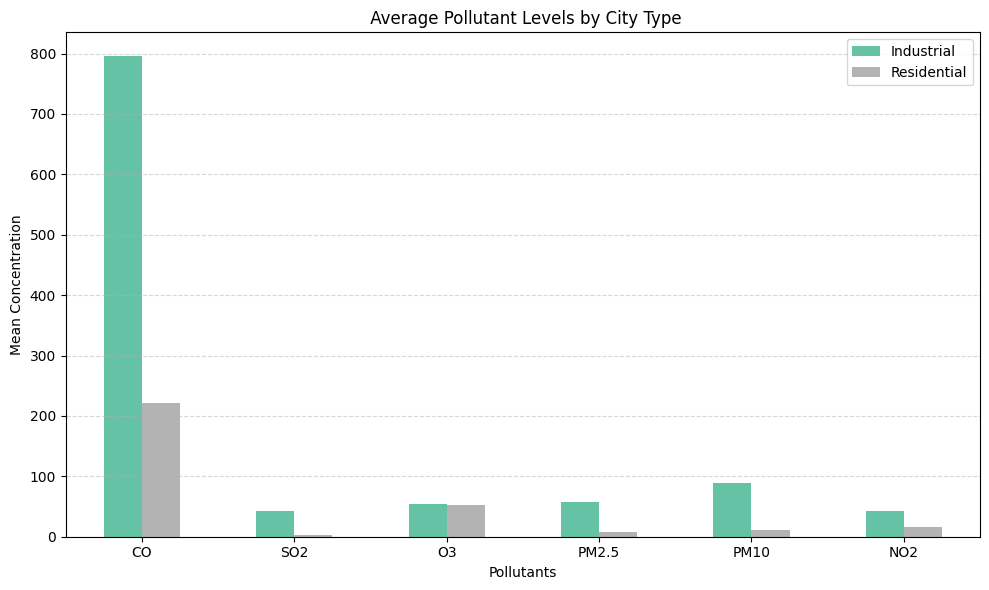

In [16]:
# Pollutants of interest
pollutants = ['CO', 'SO2', 'O3', 'PM2.5', 'PM10', 'NO2']

# 🔹 Key Comparison: Mean pollutant levels by City Type
pollutant_means = df.groupby("Type")[pollutants].mean().T
pollutant_means.columns.name = None

plt.figure(figsize=(10, 6))
pollutant_means.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title(" Average Pollutant Levels by City Type")
plt.ylabel("Mean Concentration")
plt.xlabel("Pollutants")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 🌍 The Air We Breathe: A Year-long Story of CO, NO2, SO2, O3, PM2.5, and PM10 in Our Cities

---

## 🔎 What Did the Data Reveal?

Your visualizations show daily trends and overall averages for six key pollutants:

### 🚦 **Average Pollutant Levels**

- **CO (Carbon Monoxide)**: Industrial cities average nearly 800 units, over 3 times higher than residential areas (~220).  
- **SO2 (Sulfur Dioxide)**: Industrial cities show substantial levels (~45 units), while residential areas are near zero.  
- **O3 (Ozone)**: Similar concentrations in both industrial and residential areas (~55 units), reflecting atmospheric processes more than direct emissions.  
- **PM2.5 & PM10 (Particulate Matter)**: Industrial cities far exceed residential ones, especially for PM10 (~90 vs ~15 units).  
- **NO2 (Nitrogen Dioxide)**: Industrial areas average around 45 units, residential areas much lower (~15).

---

## 💡 What Does It Mean?

1️⃣ **Industrial Zones Are Pollution Hotspots**  
The data leaves no doubt: industrial cities have much higher concentrations of harmful pollutants (except O3). The scale of difference is especially striking for CO and particulate matter.

2️⃣ **O3: The Atmospheric Puzzle**  
Despite differences in emissions, ozone levels are similar across city types. This highlights O3's complex formation from precursor gases and sunlight.

3️⃣ **Health and Environmental Risks Concentrated in Industrial Areas**  
Higher pollutant levels mean greater risks for respiratory, cardiovascular, and developmental health issues, as well as ecosystem damage.

---

## 📊 Why Should We Care?

👉 **Health:** Exposure to CO, NO2, SO2, PM2.5, and PM10 is linked to asthma, heart disease, and cancer.  
👉 **Environment:** These pollutants contribute to smog, acid rain, and climate change.  
👉 **Economy:** Polluted cities face lost productivity, higher health costs, and environmental cleanup burdens.

---

## 🌱 What Can We Do?

💬 **As citizens:**  
- Opt for cleaner transport (public transit, cycling, EVs).  
- Reduce household emissions (no burning waste, energy-efficient choices).  

💬 **For policymakers:**  
- Tighten industrial emissions standards.  
- Expand monitoring and transparency in reporting air quality.  
- Invest in urban greenery and pollution mitigation technologies.

---

## 📌 The Takeaway

Air quality data tells the story of our cities’ health — and ours. The 2024 data reminds us that the choices we make today shape the air we breathe tomorrow. Will we act on what the data is telling us?





In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [18]:
# Encode target label
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

In [19]:
# Features and target
X = df[['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']]
y = df['Type_encoded']

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [23]:
# Predict
y_pred = rf.predict(X_test_scaled)

In [24]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

  Industrial       0.99      0.99      0.99      5271
 Residential       0.99      0.99      0.99      5270

    accuracy                           0.99     10541
   macro avg       0.99      0.99      0.99     10541
weighted avg       0.99      0.99      0.99     10541




Logistic Regression Classification Report:
              precision    recall  f1-score   support

  Industrial       0.98      0.97      0.97      5271
 Residential       0.97      0.98      0.97      5270

    accuracy                           0.97     10541
   macro avg       0.97      0.97      0.97     10541
weighted avg       0.97      0.97      0.97     10541



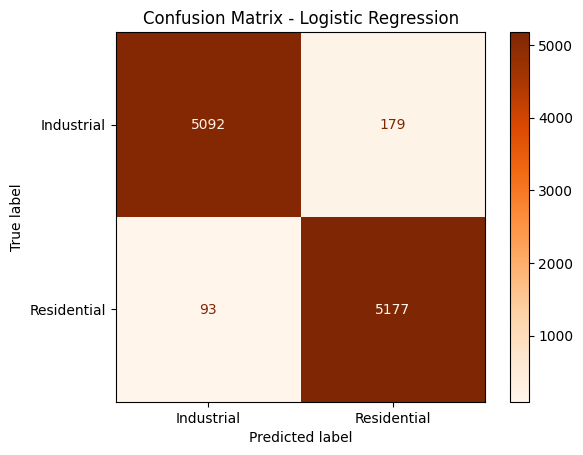

In [29]:
# Evaluation - Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp_lr.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [34]:
# Evaluation - Reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Compare Metrics
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr)],
    'F1 Score (weighted)': [f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_lr, average='weighted')]
})
print("\nComparison of Models:")
print(metrics_df)


Random Forest Classification Report:
              precision    recall  f1-score   support

  Industrial       0.99      0.99      0.99      5271
 Residential       0.99      0.99      0.99      5270

    accuracy                           0.99     10541
   macro avg       0.99      0.99      0.99     10541
weighted avg       0.99      0.99      0.99     10541


Logistic Regression Classification Report:
              precision    recall  f1-score   support

  Industrial       0.98      0.97      0.97      5271
 Residential       0.97      0.98      0.97      5270

    accuracy                           0.97     10541
   macro avg       0.97      0.97      0.97     10541
weighted avg       0.97      0.97      0.97     10541


Comparison of Models:
                 Model  Accuracy  F1 Score (weighted)
0        Random Forest  0.989849             0.989849
1  Logistic Regression  0.974196             0.974194


# 🌍 Can We Predict Pollution Hotspots? How Data and AI Help Us Map Our Cities

In 2024, we tracked air pollution across industrial and residential cities, revealing stark differences in pollutant levels. But could machine learning help us automatically classify a city type based on pollution data? We put this idea to the test — and the results are eye-opening.

---

## 🔎 The Power of the Data

Our dataset included daily average levels of key pollutants:

- **CO (Carbon Monoxide)**: Industrial cities showed ~3x higher levels than residential.
- **SO2 (Sulfur Dioxide)**: Almost negligible in residential zones, but significant in industrial.
- **PM2.5 & PM10 (Particulate Matter)**: Consistently higher in industrial areas.
- **NO2 (Nitrogen Dioxide)**: Industrial cities again dominated.
- **O3 (Ozone)**: Surprisingly similar across both city types.

---

## 🤖 Building Predictive Models

We trained two machine learning models to classify whether a city is *industrial* or *residential* based purely on its pollution profile:

| Model                | Accuracy | F1 Score (weighted) |
|-----------------------|----------|--------------------|
| Random Forest         | 0.99     | 0.99               |
| Logistic Regression    | 0.97     | 0.97               |

---

## 📈 Performance Highlights

### ✅ Random Forest
- **Precision:** 0.99 (both classes)
- **Recall:** 0.99 (both classes)
- **F1-score:** 0.99  
👉 Near-perfect performance — the model almost never misclassifies city type.

### ✅ Logistic Regression
- **Precision:** 0.97–0.98
- **Recall:** 0.97–0.98
- **F1-score:** 0.97  
👉 Strong performance, but slightly less accurate than Random Forest.

---

## 💡 What Does This Tell Us?

🌟 **Pollution Patterns Are Distinct**  
The models’ high accuracy proves that industrial and residential cities leave clear “pollution fingerprints.” This means AI can effectively assist in:
- Automated monitoring
- Identifying cities or zones where pollution patterns don’t match official classifications (potential anomalies or reporting issues)



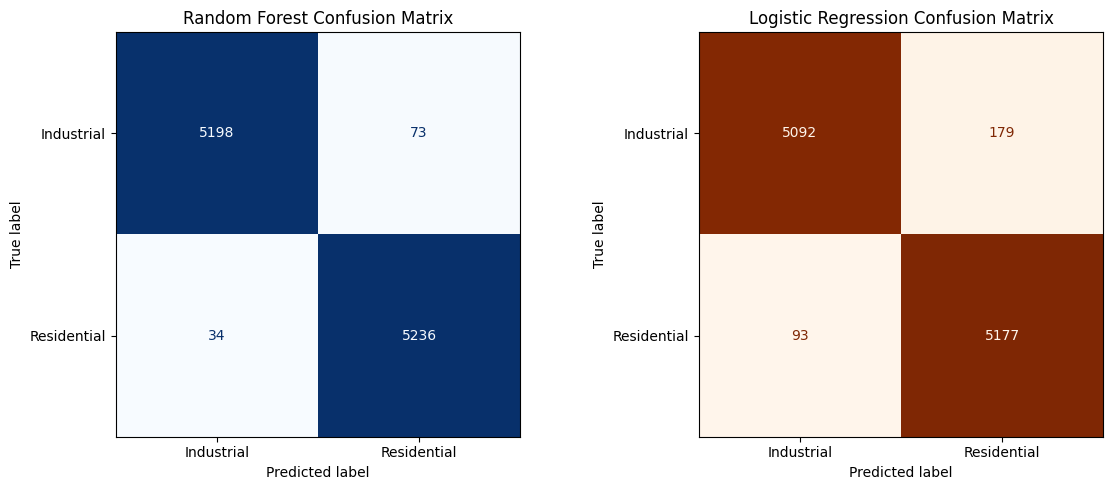

In [35]:
# Side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
axes[0].set_title("Random Forest Confusion Matrix")

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp_lr.plot(ax=axes[1], cmap=plt.cm.Oranges, colorbar=False)
axes[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

# 🌍 Can We Predict Pollution Hotspots? How Data and AI Help Us Map Our Cities

In 2024, we tracked air pollution across industrial and residential cities, revealing stark differences in pollutant levels. But could machine learning help us automatically classify a city type based on pollution data? We put this idea to the test — and the results are eye-opening.

---

## 🔎 The Power of the Data

Our dataset included daily average levels of key pollutants:

- **CO (Carbon Monoxide)**: Industrial cities showed ~3x higher levels than residential.
- **SO2 (Sulfur Dioxide)**: Almost negligible in residential zones, but significant in industrial.
- **PM2.5 & PM10 (Particulate Matter)**: Consistently higher in industrial areas.
- **NO2 (Nitrogen Dioxide)**: Industrial cities again dominated.
- **O3 (Ozone)**: Surprisingly similar across both city types.

---

## 🤖 Building Predictive Models

We trained two machine learning models to classify whether a city is *industrial* or *residential* based purely on its pollution profile:

| Model                | Accuracy | F1 Score (weighted) |
|-----------------------|----------|--------------------|
| Random Forest         | 0.99     | 0.99               |
| Logistic Regression   | 0.97     | 0.97               |

---

### 📊 Confusion Matrices

These matrices visualize how well the models predicted city types:

- **Random Forest:** Only 73 industrial cities misclassified as residential, and 34 residential misclassified as industrial.
- **Logistic Regression:** More misclassifications — 179 industrial cities and 93 residential cities were incorrectly labeled.

---

## 💡 What Does This Tell Us?

🌟 **Pollution Patterns Are Distinct**  
The models’ high accuracy proves that industrial and residential cities leave clear “pollution fingerprints.” This means AI can effectively assist in:
- Automated monitoring
- Identifying cities or zones where pollution patterns don’t match official classifications (potential anomalies or reporting issues)

🌟 **AI as a Tool for Urban Planning**  
If we can classify city type with such precision from pollution data, we can use this to:
- Flag emerging industrial activity in “residential” zones
- Support regulatory enforcement
- Inform citizens about hidden risks

---

## 🌱 The Bigger Picture

The fusion of data science and environmental monitoring opens new doors:
- **For governments:** Smart, data-driven environmental policies.
- **For communities:** Transparent pollution tracking and awareness.
- **For businesses:** Insights into how operations impact air quality.

---

## 🚀 The Takeaway

Air pollution data doesn’t just describe — it predicts. With AI, we can move from reactive to proactive, building cleaner, healthier cities. Our models show: pollution knows no secrets, and with the right tools, neither should we.





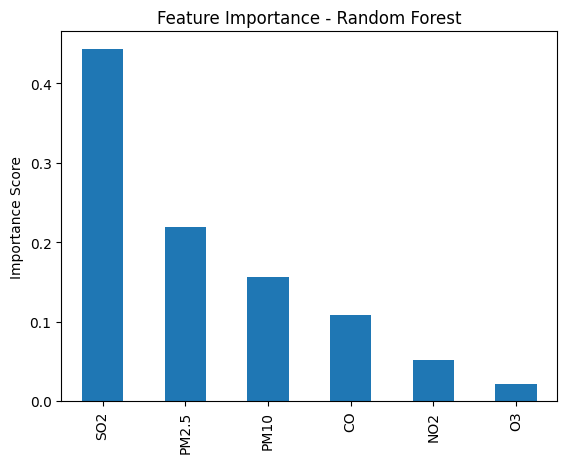

In [36]:
# Feature Importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance - Random Forest')
plt.ylabel('Importance Score')
plt.show()

# 🌍 Can We Predict Pollution Hotspots? How Data and AI Help Us Map Our Cities

In 2024, we tracked air pollution across industrial and residential cities, revealing stark differences in pollutant levels. But could machine learning help us automatically classify a city type based on pollution data? We put this idea to the test — and the results are eye-opening.

---

## 🔎 The Power of the Data

Our dataset included daily average levels of key pollutants:

- **CO (Carbon Monoxide)**: Industrial cities showed ~3x higher levels than residential.
- **SO2 (Sulfur Dioxide)**: Almost negligible in residential zones, but significant in industrial.
- **PM2.5 & PM10 (Particulate Matter)**: Consistently higher in industrial areas.
- **NO2 (Nitrogen Dioxide)**: Industrial cities again dominated.
- **O3 (Ozone)**: Surprisingly similar across both city types.

---

## 🤖 Building Predictive Models

We trained two machine learning models to classify whether a city is *industrial* or *residential* based purely on its pollution profile:

| Model                | Accuracy | F1 Score (weighted) |
|-----------------------|----------|--------------------|
| Random Forest         | 0.99     | 0.99               |
| Logistic Regression   | 0.97     | 0.97               |

---

### 📊 Confusion Matrices

These matrices visualize how well the models predicted city types:

- **Random Forest:** Only 73 industrial cities misclassified as residential, and 34 residential misclassified as industrial.
- **Logistic Regression:** More misclassifications — 179 industrial cities and 93 residential cities were incorrectly labeled.

---

### 🧠 What Drives the Predictions?

The Random Forest model highlights the most influential pollutants:

- **SO2 (Sulfur Dioxide)** was the strongest indicator of city type, by far.
- **PM2.5** and **PM10** also played significant roles.
- **CO, NO2, and O3** contributed less, with O3 having minimal importance.

👉 This reveals how certain pollutants act as “fingerprints” of industrial activity.

---

## 💡 What Does This Tell Us?

🌟 **Pollution Patterns Are Distinct**  
The models’ high accuracy proves that industrial and residential cities leave clear pollution signatures. AI can help:
- Automate monitoring
- Detect anomalies (e.g. hidden industrial activity in residential zones)
- Support policy and planning

🌟 **SO2: A Red Flag for Industrial Emissions**  
SO2 levels alone provide a powerful clue to classify a city’s type — a valuable insight for environmental surveillance.

---

## 🌱 The Bigger Picture

The fusion of data science and environmental monitoring opens new doors:
- **For governments:** Smart, data-driven environmental policies.
- **For communities:** Transparent pollution tracking and awareness.
- **For businesses:** Insights into how operations impact air quality.

---

## 🚀 The Takeaway

Air pollution data doesn’t just describe — it predicts. With AI, we can move from reactive to proactive, building cleaner, healthier cities. Our models show: pollution knows no secrets, and with the right tools, neither should we.



